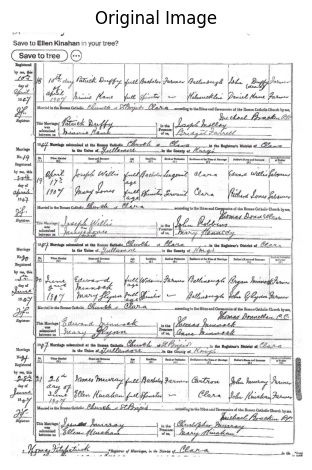

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

img_path = Path("/Users/aaronbaggot/Desktop/Script2Text/data/samples/Handwritten_2025-09-18_110153_1.png")
I = cv2.imread(str(img_path))

if I is None:
    raise Exception(f"Image not found: {img_path}")

# Convert BGR to RGB for display
I_rgb = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)

# Convert to greyscale
G = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)

T_fix = 120
_, B_fix = cv2.threshold(G, T_fix, 255, cv2.THRESH_BINARY)

# Implement the threshold of T
T = np.mean(G) + np.std(G) # Greyscale version

# Adaptive Thresholding Mean and Gaussian
thresh_mean = cv2.adaptiveThreshold(G, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
thresh_gauss = cv2.adaptiveThreshold(G, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)



# Otsu thresholding
_, thresh_otsu = cv2.threshold(G,0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# RangeLower = (0, 150, 150)
# RangeUpper = (50, 255, 255)

B_adpt = cv2.adaptiveThreshold(G, maxValue = 255, 
                          adaptiveMethod = cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                          thresholdType = cv2.THRESH_BINARY,
                          blockSize = 5, C = 15 )

# Display results


plt.imshow(I_rgb)
plt.title("Original Image")
plt.axis("off")

plt.tight_layout()
plt.show()


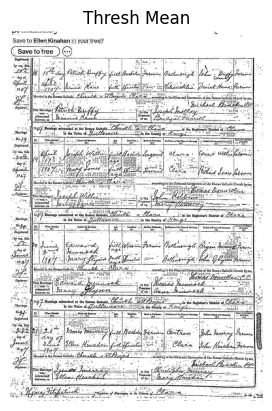

In [18]:

plt.imshow(thresh_mean, cmap='gray')
plt.title("Thresh Mean")
plt.axis("off")
plt.show()

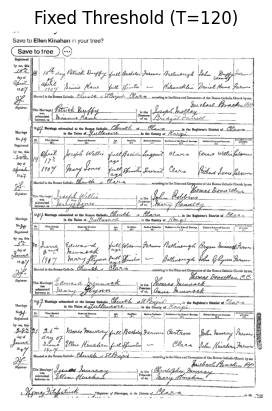

In [19]:

plt.imshow(B_fix, cmap='gray')
plt.title(f"Fixed Threshold (T={T_fix})")
plt.axis("off")
plt.show()

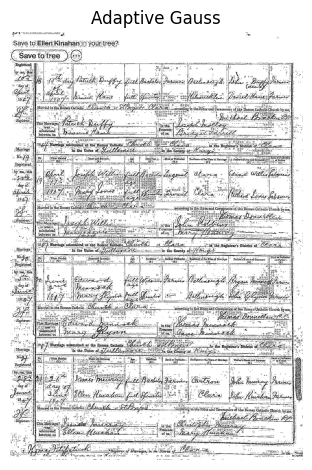

In [20]:


plt.imshow(thresh_gauss, cmap='gray')
plt.title("Adaptive Gauss")
plt.axis("off")
plt.tight_layout()
plt.show()

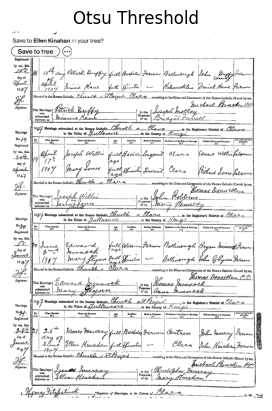

In [22]:
plt.imshow(thresh_otsu, cmap='gray')
plt.title("Otsu Threshold")
plt.axis("off")
plt.show()

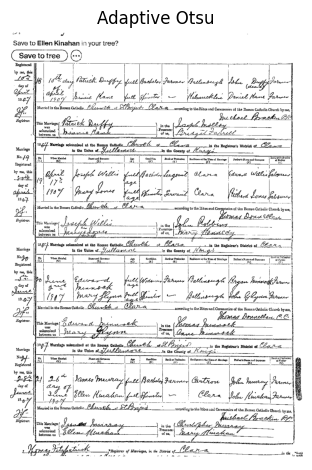

In [25]:
plt.imshow(thresh_otsu, cmap='gray')
plt.title("Adaptive Otsu")
plt.axis("off")
plt.tight_layout()
plt.show()